In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df1=pd.read_csv('Matches.csv')
df2=pd.read_csv('EloRatings.csv')

In [10]:
df1.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,NaN,Ajaccio,Le Mans,1470.87,1477.89,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,NaN,Beauvais,Montpellier,1422.21,1606.00,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import pandas as pd

# Sample mapping dictionary (you can expand this based on your dataset)
division_mapping = {
    'F1': 'France Ligue 1',
    'F2': 'France Ligue 2',
    'E0': 'England Premier League',
    'E1': 'England Championship',
    'D1': 'Germany Bundesliga 1',
    'D2': 'Germany Bundesliga 2',
    'I1': 'Italy Serie A',
    'I2': 'Italy Serie B',
    'SP1': 'Spain La Liga',
    'SP2': 'Spain Segunda Division',
    # Add more mappings as per your dataset
}

# Create a new column with full league names
df1['DivisionFull'] = df1['Division'].map(division_mapping)


In [12]:
df1.drop(columns=['Division'], inplace=True)

In [13]:
df1.drop(columns=['MatchTime'], inplace=True)

In [14]:
#convert form column

# Define the weights for the 3-match and 5-match forms.
w1 = 0.3  # Weight for the 3-match form
w2 = 0.7  # Weight for the 5-match form

# Create a new column 'FormScore' that is the weighted difference between home and away forms.
df1['FormScore'] = (df1['Form3Home'] * w1 + df1['Form5Home'] * w2) - (df1['Form3Away'] * w1 + df1['Form5Away'] * w2)

# Drop the original four columns if they are no longer needed.
df1.drop(columns=['Form3Home', 'Form5Home', 'Form3Away', 'Form5Away'], inplace=True)

# Display the updated DataFrame.
print(df1)

'''If the number is positive, it means the home friend did better.

If the number is negative, it means the away friend did better'''



         MatchDate       HomeTeam     AwayTeam  HomeElo  AwayElo  FTHome  \
0       2000-07-28      Marseille       Troyes  1686.34  1586.57     3.0   
1       2000-07-28       Paris SG   Strasbourg  1714.89  1642.51     3.0   
2       2000-07-28      Wasquehal        Nancy  1465.08  1633.80     0.0   
3       2000-07-29        Ajaccio      Le Mans  1470.87  1477.89     1.0   
4       2000-07-29       Beauvais  Montpellier  1422.21  1606.00     1.0   
...            ...            ...          ...      ...      ...     ...   
228372  2025-02-26      Brentford      Everton  1738.05  1731.52     1.0   
228373  2025-02-26     Man United      Ipswich  1757.62  1584.51     3.0   
228374  2025-02-26  Nott'm Forest      Arsenal  1788.28  1999.49     0.0   
228375  2025-02-26      Tottenham     Man City  1785.53  1926.48     0.0   
228376  2025-02-26      Liverpool    Newcastle  1995.58  1826.18     2.0   

        FTAway FTResult  HTHome  HTAway  ... MaxAway  Over25  Under25  \
0          1.0

'If the number is positive, it means the home friend did better.\n\nIf the number is negative, it means the away friend did better'

In [15]:
# elo diff for convienience as postive them home team better if negative then away team

df1['EloDifference'] = df1['HomeElo'] - df1['AwayElo']


In [16]:
# full time goal diff and total goal diff

# 1. Full-Time Goal Difference and Total Goals
df1['FTGoalDiff'] = df1['FTHome'] - df1['FTAway']
df1['FTTotalGoals'] = df1['FTHome'] + df1['FTAway']

'''FTGoalDiff:
The difference in full-time goals between the home and away teams (FTHome - FTAway). This shows which team had the edge in scoring overall.

FTTotalGoals:
The sum of full-time goals (FTHome + FTAway), providing an idea of the match’s overall attacking nature.'''



# 2. Half-Time Goal Difference and Total Goals
df1['HTGoalDiff'] = df1['HTHome'] - df1['HTAway']
df1['HTTotalGoals'] = df1['HTHome'] + df1['HTAway']


'''HTGoalDiff:
The difference in half-time goals between the home and away teams (HTHome - HTAway). This captures the balance at halftime.

HTTotalGoals:
The total number of goals scored by both teams in the first half (HTHome + HTAway).'''

# 3. Consistency Indicator between Half-Time and Full-Time outcomes.
# This feature is 1 if the result at half-time is the same as at full-time, otherwise 0.
df1['ResultConsistency'] = (df1['FTResult'] == df1['HTResult']).astype(int)



# 4. Change in Goal Difference: How much did the goal difference shift in the second half?
df1['Improvement'] = df1['FTGoalDiff'] - df1['HTGoalDiff']

'''Improvement (or Change in Goal Difference):
The difference between the full-time goal difference and the half-time goal difference. This can indicate how much the scoreline changed in the second half.'''


'''
Numerical Result Encoding:
Convert the result features (FTResult and HTResult) from categorical data (with values like 'H', 'D', 'A') into numbers. For example, you might use:

Home win: 1

Draw: 0

Away win: -1

'''

# 5. Convert result labels to numeric values.
result_mapping = {'H': 1, 'D': 0, 'A': -1}
df1['FTResult_Num'] = df1['FTResult'].map(result_mapping)
df1['HTResult_Num'] = df1['HTResult'].map(result_mapping)

In [46]:
# Remove the original columns if they are no longer needed.
columns_to_drop = ['FTHome', 'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult']
df1.drop(columns=columns_to_drop, inplace=True)

In [17]:
df1.head()

,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,FTHome,FTAway,FTResult,HTHome,HTAway,...,FormScore,EloDifference,FTGoalDiff,FTTotalGoals,HTGoalDiff,HTTotalGoals,ResultConsistency,Improvement,FTResult_Num,HTResult_Num
0,2000-07-28,Marseille,Troyes,1686.34,1586.57,3.0,1.0,H,2.0,1.0,...,0.0,99.77,2.0,4.0,1.0,3.0,1,1.0,1.0,1.0
1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,3.0,1.0,H,1.0,1.0,...,0.0,72.38,2.0,4.0,0.0,2.0,0,2.0,1.0,0.0
2,2000-07-28,Wasquehal,Nancy,1465.08,1633.80,0.0,1.0,A,0.0,1.0,...,0.0,-168.72,-1.0,1.0,-1.0,1.0,1,0.0,-1.0,-1.0
3,2000-07-29,Ajaccio,Le Mans,1470.87,1477.89,1.0,0.0,H,1.0,0.0,...,0.0,-7.02,1.0,1.0,1.0,1.0,1,0.0,1.0,1.0
4,2000-07-29,Beauvais,Montpellier,1422.21,1606.00,1.0,3.0,A,0.0,1.0,...,0.0,-183.79,-2.0,4.0,-1.0,1.0,1,-1.0,-1.0,-1.0


In [18]:
# 3. Fouls Difference: Difference between fouls committed by home and away teams.
df1['FoulsDiff'] = df1['HomeFouls'] - df1['AwayFouls']
# A positive value means the home team committed more fouls.


In [19]:
# 4. Ratio Features:
#    - ShotsRatio: Ratio of home shots to away shots.
#    - TargetRatio: Ratio of home shots on target to away shots on target.
epsilon = 1e-5  # A small constant to avoid division by zero.
df1['ShotsRatio'] = df1['HomeShots'] / (df1['AwayShots'] + epsilon)
df1['TargetRatio'] = df1['HomeTarget'] / (df1['AwayTarget'] + epsilon)

In [20]:
# 5. Performance Index:
#    Combines FormScore with a normalized EloDifference.
#    Here we add FormScore and the EloDifference divided by 100 (you can change the normalization factor).
df1['PerformanceIndex'] = df1['FormScore'] + (df1['EloDifference'] / 100)


In [21]:
df1.head()

,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,FTHome,FTAway,FTResult,HTHome,HTAway,...,HTGoalDiff,HTTotalGoals,ResultConsistency,Improvement,FTResult_Num,HTResult_Num,FoulsDiff,ShotsRatio,TargetRatio,PerformanceIndex
0,2000-07-28,Marseille,Troyes,1686.34,1586.57,3.0,1.0,H,2.0,1.0,...,1.0,3.0,1,1.0,1.0,1.0,NaN,NaN,NaN,0.9977
1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,3.0,1.0,H,1.0,1.0,...,0.0,2.0,0,2.0,1.0,0.0,NaN,NaN,NaN,0.7238
2,2000-07-28,Wasquehal,Nancy,1465.08,1633.80,0.0,1.0,A,0.0,1.0,...,-1.0,1.0,1,0.0,-1.0,-1.0,NaN,NaN,NaN,-1.6872
3,2000-07-29,Ajaccio,Le Mans,1470.87,1477.89,1.0,0.0,H,1.0,0.0,...,1.0,1.0,1,0.0,1.0,1.0,NaN,NaN,NaN,-0.0702
4,2000-07-29,Beauvais,Montpellier,1422.21,1606.00,1.0,3.0,A,0.0,1.0,...,-1.0,1.0,1,-1.0,-1.0,-1.0,NaN,NaN,NaN,-1.8379


In [22]:
#shots and fouls and red,yellow

df1['ShotAccuracyHome'] = df1['HomeTarget'] / (df1['HomeShots'] + epsilon)
df1['ShotAccuracyAway'] = df1['AwayTarget'] / (df1['AwayShots'] + epsilon)

In [23]:

# 3. Corners difference
df1['CornersDiff'] = df1['HomeCorners'] - df1['AwayCorners']

# 4. Card-related features
df1['YellowDiff'] = df1['HomeYellow'] - df1['AwayYellow']
df1['RedDiff'] = df1['HomeRed'] - df1['AwayRed']

# 5. Discipline scoring (Red = 3 pts, Yellow = 1 pt)
df1['DisciplineScoreHome'] = df1['HomeYellow'] + (df1['HomeRed'] * 3)
df1['DisciplineScoreAway'] = df1['AwayYellow'] + (df1['AwayRed'] * 3)
df1['AggressionDiff'] = df1['DisciplineScoreHome'] - df1['DisciplineScoreAway']


In [47]:
# Optional: Drop old columns if not needed
columns_to_drop = [
    'HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget',
    'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners',
    'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed'
]
df1.drop(columns=columns_to_drop, inplace=True)  # Remove this line if you want to keep original columns

# View result
df1.head()

,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,DivisionFull,FormScore,EloDifference,FTGoalDiff,FTTotalGoals,...,HandicapFavoring,NetDisciplineScore,AggressionRolling,DisciplineDiffHA,GoalsDisciplineRatio,RollingGoalDiff,ImprovementHA,EloTierHome,EloTierAway,GoalStyle
0,2000-07-28,Marseille,Troyes,1686.34,1586.57,France Ligue 1,0.0,99.77,2.0,4.0,...,0.0,-0.394938,-0.394908,-0.255955,0.758077,2.0,99.77,High,High,2.095885
1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,France Ligue 1,0.0,72.38,2.0,4.0,...,0.0,-0.394938,-0.394908,-0.351410,0.758077,2.0,72.38,High,High,2.004585
2,2000-07-28,Wasquehal,Nancy,1465.08,1633.80,France Ligue 2,0.0,-168.72,-1.0,1.0,...,0.0,-0.394938,-0.394908,-0.394938,0.189519,-1.0,-168.72,Medium,High,1.200919
3,2000-07-29,Ajaccio,Le Mans,1470.87,1477.89,France Ligue 2,0.0,-7.02,1.0,1.0,...,0.0,-0.394938,-0.394908,-0.256235,0.189519,1.0,-7.02,Medium,Medium,1.739919
4,2000-07-29,Beauvais,Montpellier,1422.21,1606.00,France Ligue 2,0.0,-183.79,-2.0,4.0,...,0.0,-0.394938,-0.394908,-0.394938,0.758077,-2.0,-183.79,Low,High,1.150685


In [24]:
# now connect the elo rating csv here

df2.head()

# no need lets examine old and bets

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53
3,2000-07-01,Aarhus,DEN,1381.46
4,2000-07-01,Aberdeen,SCO,1360.43


In [25]:
# examinining final betting reports

# ✅ Convert basic odds into implied probabilities (1 / odds), to represent expected chances
df1['ImpProbHome'] = 1 / (df1['OddHome'] + 1e-5)   # Implied win probability of Home team
df1['ImpProbDraw'] = 1 / (df1['OddDraw'] + 1e-5)   # Implied probability of a Draw
df1['ImpProbAway'] = 1 / (df1['OddAway'] + 1e-5)   # Implied win probability of Away team

# ✅ Bookmaker margin (aka "overround") tells us how much margin the bookmaker includes beyond 100%
df1['BookmakerMargin'] = df1['ImpProbHome'] + df1['ImpProbDraw'] + df1['ImpProbAway'] - 1
# High margin = less trustworthy odds (bookie making more profit)

# ✅ Find which outcome is the bookmaker’s favorite based on the lowest odds
df1['Favorite'] = df1[['OddHome', 'OddDraw', 'OddAway']].idxmin(axis=1)
# Result will be 'OddHome', 'OddDraw', or 'OddAway'

# ✅ Odds spread gives an idea of match uncertainty — closer odds mean tighter competition
df1['OddsSpread'] = df1[['OddHome', 'OddDraw', 'OddAway']].max(axis=1) - df1[['OddHome', 'OddDraw', 'OddAway']].min(axis=1)

# ✅ Max odds from all bookmakers — repeat implied probability logic for the best value odds
df1['MaxImpProbHome'] = 1 / (df1['MaxHome'] + 1e-5)  # Max implied probability for Home win
df1['MaxImpProbDraw'] = 1 / (df1['MaxDraw'] + 1e-5)  # Max implied probability for Draw
df1['MaxImpProbAway'] = 1 / (df1['MaxAway'] + 1e-5)  # Max implied probability for Away win

# ✅ Similar to earlier odds spread, but for max values — shows market-wide confidence
df1['MaxOddsSpread'] = df1[['MaxHome', 'MaxDraw', 'MaxAway']].max(axis=1) - df1[['MaxHome', 'MaxDraw', 'MaxAway']].min(axis=1)

# ✅ Over/Under 2.5 goals implied probabilities (used for predicting goal-rich or tight matches)
df1['OUImpliedOver'] = 1 / (df1['Over25'] + 1e-5)      # Implied prob for Over 2.5 goals
df1['OUImpliedUnder'] = 1 / (df1['Under25'] + 1e-5)    # Implied prob for Under 2.5 goals
df1['OUConfidence'] = df1['OUImpliedOver'] - df1['OUImpliedUnder']
# If positive, public expects more goals. Negative = fewer goals likely.

# ✅ Max odds market's difference on Over/Under lines
df1['MaxOUSpread'] = df1['MaxOver25'] - df1['MaxUnder25']
# Bigger difference = uncertainty on goals total

# ✅ Handicap odds difference: Tells how the betting markets weigh home vs away with handicap
df1['HandiOddsDiff'] = df1['HandiHome'] - df1['HandiAway']
# Positive = home side less favored, negative = more favored with handicap

# ✅ Who is being favored in the handicap line (based on sign of the handicap size)
df1['HandicapFavoring'] = df1['HandiSize'].apply(lambda x: 'Home' if x < 0 else 'Neutral/Away')
# Handicap values < 0 suggest home team is stronger

# (Optional) Clean-up: Drop old columns if no longer needed after feature engineering
columns_to_drop = [
    'OddHome', 'OddDraw', 'OddAway',
    'MaxHome', 'MaxDraw', 'MaxAway',
    'Over25', 'Under25', 'MaxOver25', 'MaxUnder25',
    'HandiSize', 'HandiHome', 'HandiAway'
]
# Uncomment below line to drop the raw columns and keep only engineered features
# df1.drop(columns=columns_to_drop, inplace=True)


In [26]:
df1.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df1.head()

,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,DivisionFull,FormScore,EloDifference,FTGoalDiff,FTTotalGoals,...,MaxImpProbHome,MaxImpProbDraw,MaxImpProbAway,MaxOddsSpread,OUImpliedOver,OUImpliedUnder,OUConfidence,MaxOUSpread,HandiOddsDiff,HandicapFavoring
0,2000-07-28,Marseille,Troyes,1686.34,1586.57,France Ligue 1,0.0,99.77,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Away
1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,France Ligue 1,0.0,72.38,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Away
2,2000-07-28,Wasquehal,Nancy,1465.08,1633.80,France Ligue 2,0.0,-168.72,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Away
3,2000-07-29,Ajaccio,Le Mans,1470.87,1477.89,France Ligue 2,0.0,-7.02,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Away
4,2000-07-29,Beauvais,Montpellier,1422.21,1606.00,France Ligue 2,0.0,-183.79,-2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Away


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228377 entries, 0 to 228376
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MatchDate            228377 non-null  object 
 1   HomeTeam             228377 non-null  object 
 2   AwayTeam             228377 non-null  object 
 3   HomeElo              139910 non-null  float64
 4   AwayElo              139842 non-null  float64
 5   FTHome               228374 non-null  float64
 6   FTAway               228374 non-null  float64
 7   FTResult             228374 non-null  object 
 8   HTHome               173797 non-null  float64
 9   HTAway               173797 non-null  float64
 10  HTResult             173797 non-null  object 
 11  HomeShots            112555 non-null  float64
 12  AwayShots            112558 non-null  float64
 13  HomeTarget           111749 non-null  float64
 14  AwayTarget           111752 non-null  float64
 15  HomeFouls        

In [28]:
# Step 1: Map string values to numeric codes
# For example: 'Home' = 1.0, 'Neutral/Away' = 0.0 (or use other logic depending on your model)
df1['HandicapFavoring'] = df1['HandicapFavoring'].map({
    'Home': 1.0,
    'Neutral/Away': 0.0
})

# Step 2: Ensure the column is now float
df1['HandicapFavoring'] = df1['HandicapFavoring'].astype(float)


In [29]:
# Step 1: Map string values to numeric values
# Example logic:
# 'Home' → 1.0, 'Away' → -1.0, 'Draw' → 0.0 (neutral outcome)

df1['Favorite'] = df1['Favorite'].map({
    'Home': 1.0,
    'Draw': 0.0,
    'Away': -1.0
})

# Step 2: Ensure column is float
df1['Favorite'] = df1['Favorite'].astype(float)


In [30]:
import pandas as pd

# Convert 'MatchDate' column to datetime format
df1['MatchDate'] = pd.to_datetime(df1['MatchDate'], errors='coerce')


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228377 entries, 0 to 228376
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MatchDate            228377 non-null  datetime64[ns]
 1   HomeTeam             228377 non-null  object        
 2   AwayTeam             228377 non-null  object        
 3   HomeElo              139910 non-null  float64       
 4   AwayElo              139842 non-null  float64       
 5   FTHome               228374 non-null  float64       
 6   FTAway               228374 non-null  float64       
 7   FTResult             228374 non-null  object        
 8   HTHome               173797 non-null  float64       
 9   HTAway               173797 non-null  float64       
 10  HTResult             173797 non-null  object        
 11  HomeShots            112555 non-null  float64       
 12  AwayShots            112558 non-null  float64       
 13  HomeTarget    

In [32]:
df1.drop(columns=['Favorite'], inplace=True)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228377 entries, 0 to 228376
Data columns (total 61 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MatchDate            228377 non-null  datetime64[ns]
 1   HomeTeam             228377 non-null  object        
 2   AwayTeam             228377 non-null  object        
 3   HomeElo              139910 non-null  float64       
 4   AwayElo              139842 non-null  float64       
 5   FTHome               228374 non-null  float64       
 6   FTAway               228374 non-null  float64       
 7   FTResult             228374 non-null  object        
 8   HTHome               173797 non-null  float64       
 9   HTAway               173797 non-null  float64       
 10  HTResult             173797 non-null  object        
 11  HomeShots            112555 non-null  float64       
 12  AwayShots            112558 non-null  float64       
 13  HomeTarget    

In [ ]:
#lets eda after cleaning



In [34]:
# check for missing values

missing_values = df1.isnull().sum()
missing_values

# in percentage

missing_values_percentage = (df1.isnull().sum() / len(df1)) * 100
missing_values_percentage

,0
MatchDate,0.000000
HomeTeam,0.000000
AwayTeam,0.000000
HomeElo,38.737263
AwayElo,38.767039
...,...
OUImpliedUnder,35.975602
OUConfidence,35.975602
MaxOUSpread,35.975602
HandiOddsDiff,32.446788


In [35]:
df1[['HomeElo', 'AwayElo', 'EloDifference', 'PerformanceIndex']] = df1[['HomeElo', 'AwayElo', 'EloDifference', 'PerformanceIndex']].fillna(method='ffill')  # forward fill


In [36]:
df1['FormScore'] = df1['FormScore'].fillna(df1['FormScore'].median())


In [37]:
ht_cols = ['HTGoalDiff', 'HTTotalGoals', 'Improvement', 'HTResult_Num']
df1[ht_cols] = df1[ht_cols].fillna(df1[ht_cols].mean())


In [38]:
disc_cols = ['FoulsDiff', 'ShotsRatio', 'TargetRatio', 'ShotAccuracyHome', 'ShotAccuracyAway', 'CornersDiff',
             'YellowDiff', 'RedDiff', 'DisciplineScoreHome', 'DisciplineScoreAway', 'AggressionDiff']

df1[disc_cols] = df1[disc_cols].fillna(df1[disc_cols].mean())


In [39]:
odds_cols = ['ImpProbHome', 'ImpProbDraw', 'ImpProbAway', 'BookmakerMargin', 'OddsSpread',
             'MaxImpProbHome', 'MaxImpProbDraw', 'MaxImpProbAway', 'MaxOddsSpread',
             'OUImpliedOver', 'OUImpliedUnder', 'OUConfidence', 'MaxOUSpread',
             'HandiOddsDiff']

df1[odds_cols] = df1[odds_cols].fillna(df1[odds_cols].median())


In [40]:
df1.isnull().sum()

,0
MatchDate,0
HomeTeam,0
AwayTeam,0
HomeElo,0
AwayElo,0
...,...
OUImpliedUnder,0
OUConfidence,0
MaxOUSpread,0
HandiOddsDiff,0


In [41]:
# remove duplicate

df1.drop_duplicates(inplace=True)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228377 entries, 0 to 228376
Data columns (total 61 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MatchDate            228377 non-null  datetime64[ns]
 1   HomeTeam             228377 non-null  object        
 2   AwayTeam             228377 non-null  object        
 3   HomeElo              228377 non-null  float64       
 4   AwayElo              228377 non-null  float64       
 5   FTHome               228374 non-null  float64       
 6   FTAway               228374 non-null  float64       
 7   FTResult             228374 non-null  object        
 8   HTHome               173797 non-null  float64       
 9   HTAway               173797 non-null  float64       
 10  HTResult             173797 non-null  object        
 11  HomeShots            112555 non-null  float64       
 12  AwayShots            112558 non-null  float64       
 13  HomeTarget    

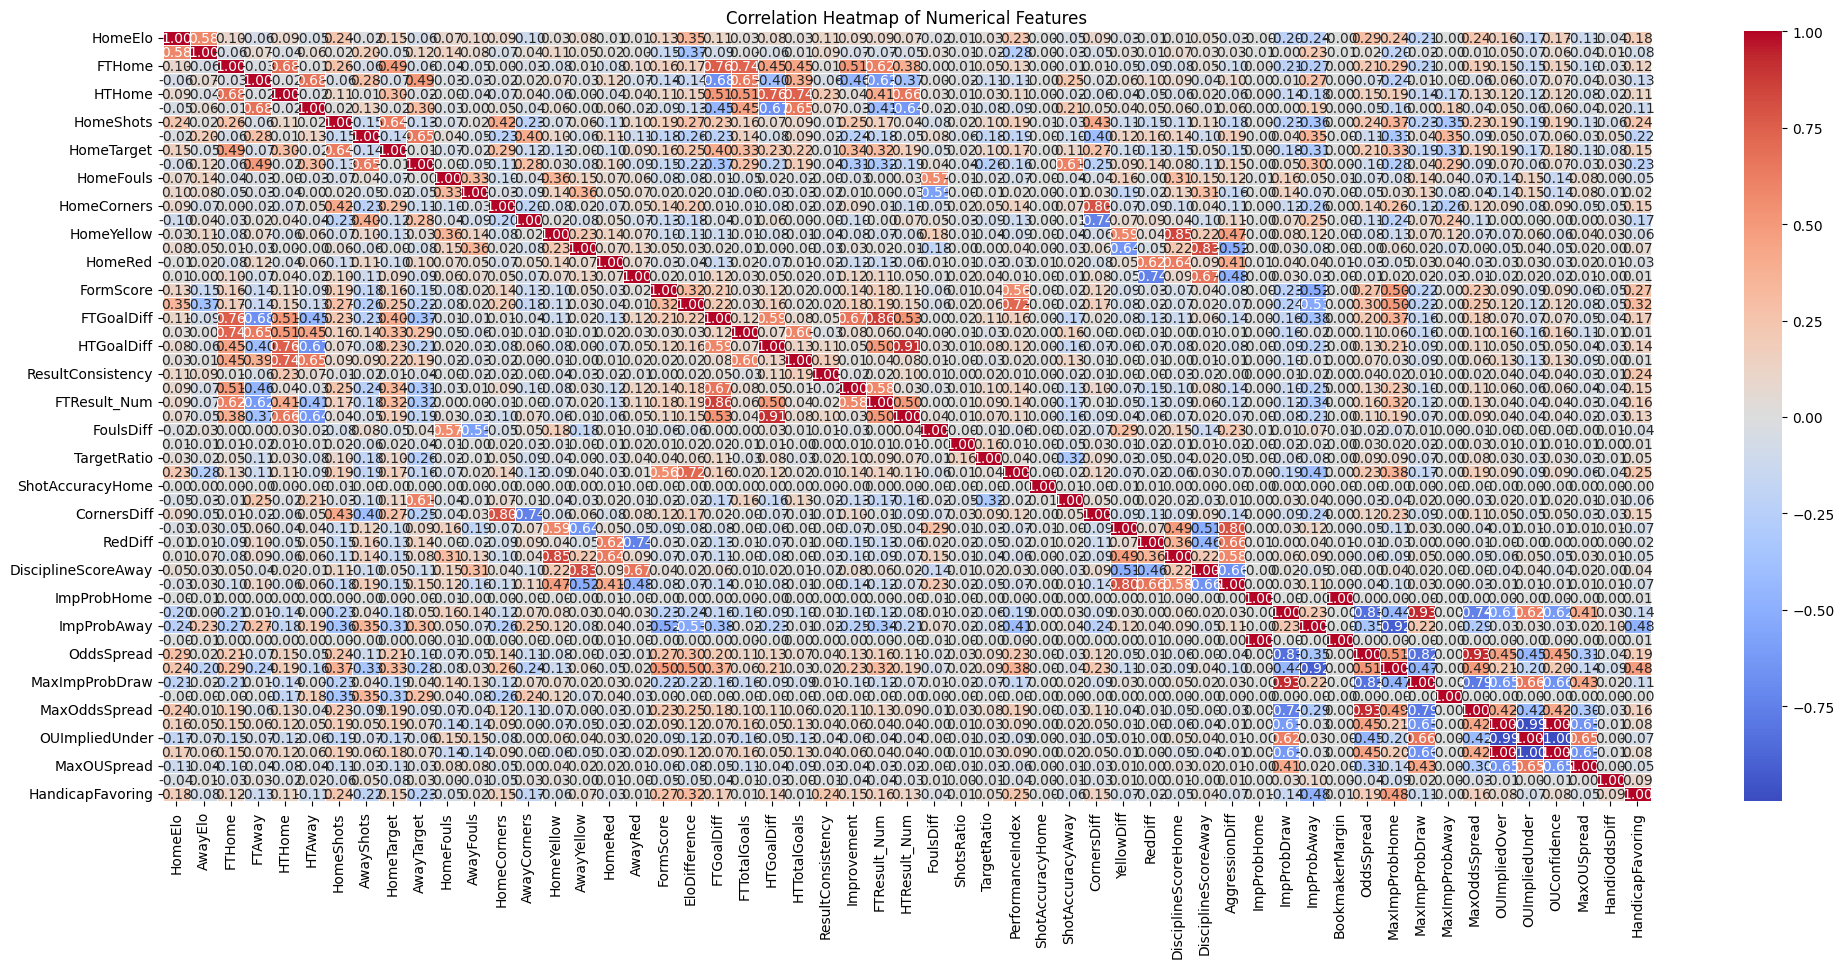

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and contains numerical data
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df1[numerical_columns].corr()

plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


✅ FormScore

✅ PerformanceIndex

✅ FTGoalDiff / HTGoalDiff

✅ ResultConsistency

✅ Improvement

✅ ImpProbHome / Away

✅ OUConfidence / OUImpliedOver

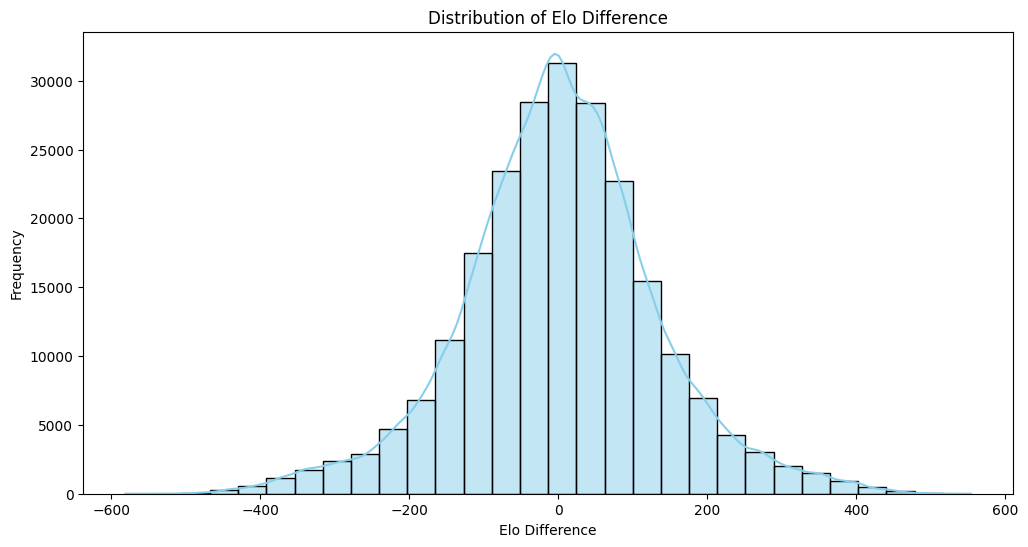

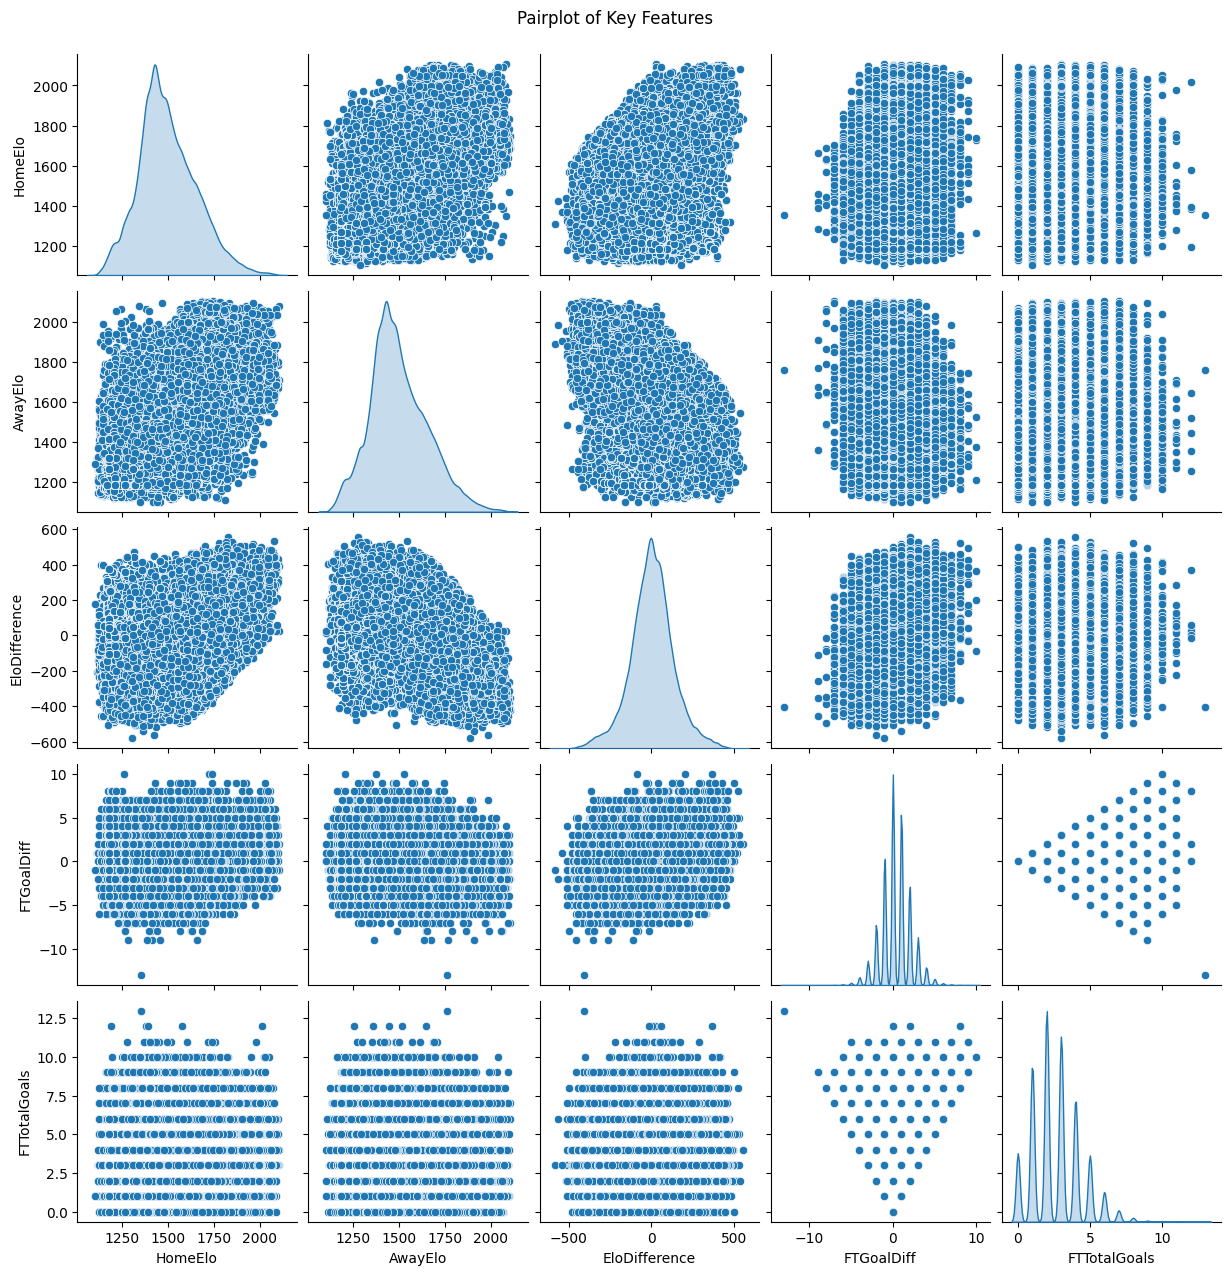

In [ ]:
# distribution plot for knowing the elodiff with other

# Plotting the distribution of EloDifference
plt.figure(figsize=(12, 6))
sns.histplot(df1['EloDifference'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Elo Difference')
plt.xlabel('Elo Difference')
plt.ylabel('Frequency')
plt.show()


# pair plot to visualize the set of important features

sns.pairplot(df1[['HomeElo', 'AwayElo', 'EloDifference', 'FTGoalDiff', 'FTTotalGoals']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


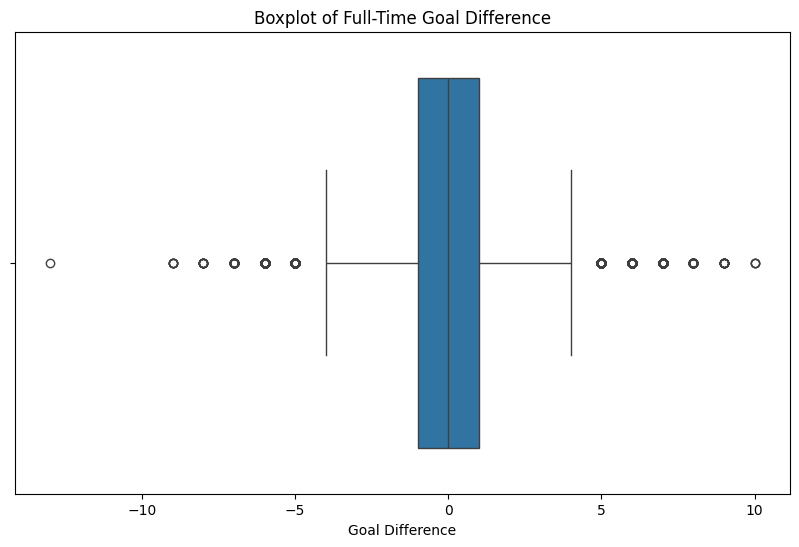

In [ ]:
# Boxplot for FTGoalDiff (Full-Time Goal Difference)
plt.figure(figsize=(10, 6))
sns.boxplot(x='FTGoalDiff', data=df1)
plt.title('Boxplot of Full-Time Goal Difference')
plt.xlabel('Goal Difference')
plt.show()

# remove outliener

Q1 = df1['FTGoalDiff'].quantile(0.25)
Q3 = df1['FTGoalDiff'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1 = df1[(df1['FTGoalDiff'] >= lower_bound) & (df1['FTGoalDiff'] <= upper_bound)]




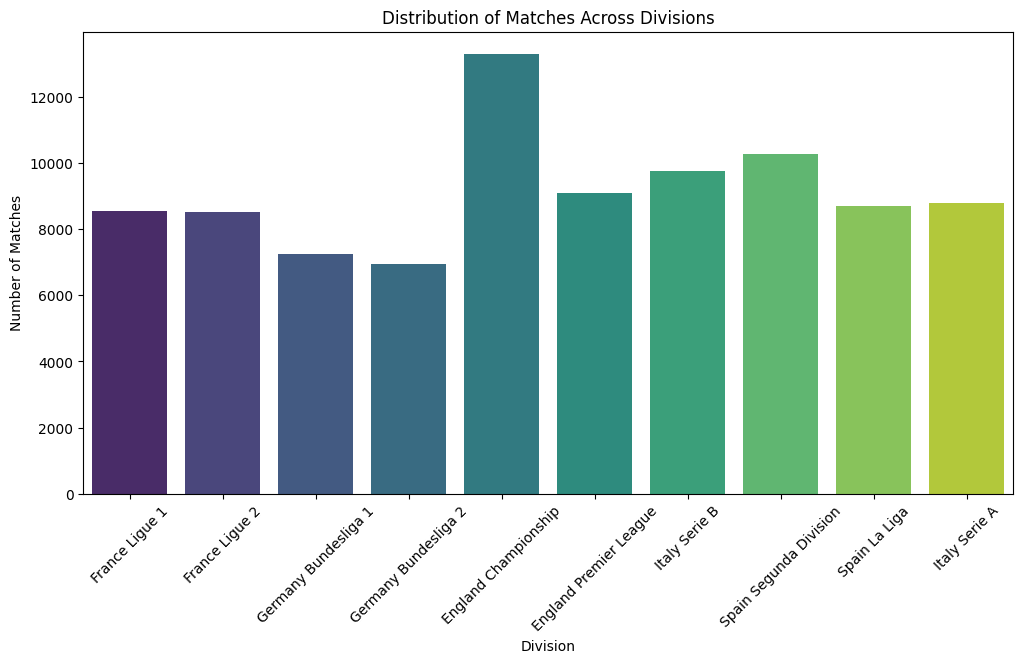

In [ ]:
# Count plot for DivisionFull to see distribution of matches in each division
plt.figure(figsize=(12, 6))
sns.countplot(x='DivisionFull', data=df1, palette='viridis')
plt.title('Distribution of Matches Across Divisions')
plt.xlabel('Division')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


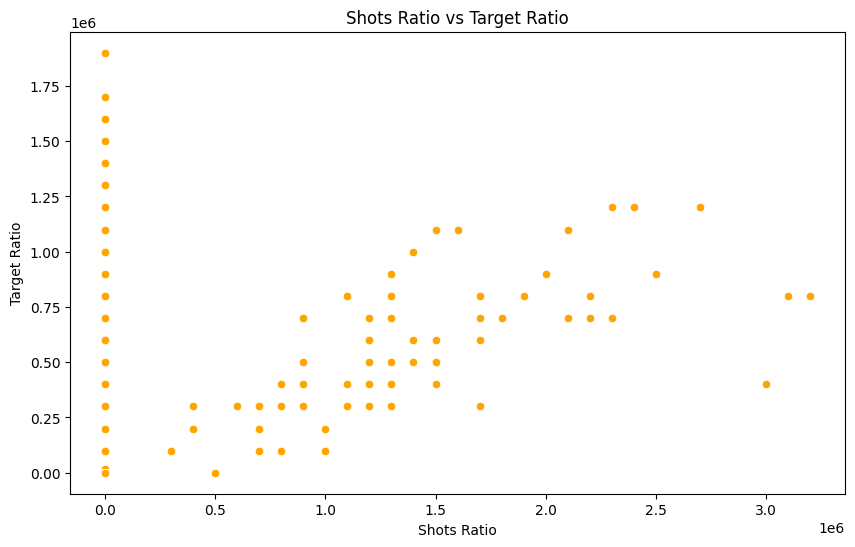

In [ ]:
# Scatter plot for Shots Ratio vs Target Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ShotsRatio', y='TargetRatio', data=df1, color='orange')
plt.title('Shots Ratio vs Target Ratio')
plt.xlabel('Shots Ratio')
plt.ylabel('Target Ratio')
plt.show()


In [44]:
import pandas as pd
import numpy as np

# 1. Net Discipline Score: Difference between home and away team discipline in a match
df1['NetDisciplineScore'] = df1['DisciplineScoreHome'] - df1['DisciplineScoreAway']

# 2. AggressionRolling: Rolling average of aggression over last 5 games for HomeTeam
df1['AggressionRolling'] = df1.groupby('HomeTeam')['AggressionDiff'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# 3. DisciplineDiffHA: How different teams behave at home vs away on average
team_discipline = df1.groupby('HomeTeam')[['DisciplineScoreHome', 'DisciplineScoreAway']].mean().reset_index()
team_discipline['DisciplineDiffHA'] = team_discipline['DisciplineScoreHome'] - team_discipline['DisciplineScoreAway']

# Merge this stat back to df1
df1 = df1.merge(team_discipline[['HomeTeam', 'DisciplineDiffHA']], on='HomeTeam', how='left')

# 4. GoalsDisciplineRatio: Are they effective attackers despite being aggressive?
df1['GoalsDisciplineRatio'] = df1['FTTotalGoals'] / (1 + df1['DisciplineScoreHome'] + df1['DisciplineScoreAway'])

# 5. RollingGoalDiff: Recent form trend using goal difference for HomeTeam
df1['RollingGoalDiff'] = df1.groupby('HomeTeam')['FTGoalDiff'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# 6. ImprovementHA: Difference in Elo ratings (Home - Away)
df1['ImprovementHA'] = df1['HomeElo'] - df1['AwayElo']

# 7. EloTier: Binned Elo strength categories
df1['EloTierHome'] = pd.qcut(df1['HomeElo'], q=3, labels=['Low', 'Medium', 'High'])
df1['EloTierAway'] = pd.qcut(df1['AwayElo'], q=3, labels=['Low', 'Medium', 'High'])

# 8. GoalStyle: A mix of shot accuracy and performance index
df1['GoalStyle'] = (df1['ShotAccuracyHome'] + df1['ShotAccuracyAway'] + df1['PerformanceIndex']) / 3


In [48]:
df1.columns

Index(['MatchDate', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo',
       'DivisionFull', 'FormScore', 'EloDifference', 'FTGoalDiff',
       'FTTotalGoals', 'HTGoalDiff', 'HTTotalGoals', 'ResultConsistency',
       'Improvement', 'FTResult_Num', 'HTResult_Num', 'FoulsDiff',
       'ShotsRatio', 'TargetRatio', 'PerformanceIndex', 'ShotAccuracyHome',
       'ShotAccuracyAway', 'CornersDiff', 'YellowDiff', 'RedDiff',
       'DisciplineScoreHome', 'DisciplineScoreAway', 'AggressionDiff',
       'ImpProbHome', 'ImpProbDraw', 'ImpProbAway', 'BookmakerMargin',
       'OddsSpread', 'MaxImpProbHome', 'MaxImpProbDraw', 'MaxImpProbAway',
       'MaxOddsSpread', 'OUImpliedOver', 'OUImpliedUnder', 'OUConfidence',
       'MaxOUSpread', 'HandiOddsDiff', 'HandicapFavoring',
       'NetDisciplineScore', 'AggressionRolling', 'DisciplineDiffHA',
       'GoalsDisciplineRatio', 'RollingGoalDiff', 'ImprovementHA',
       'EloTierHome', 'EloTierAway', 'GoalStyle'],
      dtype='object')

In [49]:

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [54]:
# 4. Prepare train/test
X = df1.drop(columns=['MatchDate','HomeTeam','AwayTeam','FTResult_Num','HTResult_Num'])
y = df1['FTResult_Num']
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42, stratify=y)


In [53]:
# OPTION 2 – FILL with the mode (most frequent result)
mode_ft = df1['FTResult_Num'].mode()[0]
df1['FTResult_Num'].fillna(mode_ft, inplace=True)

In [55]:

# 5. Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8,10))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# 7. Prediction function
def predict_winner(home_team, away_team):
    # Elo
    home_elo = df2[df2['Team']==home_team]['Elo'].iloc[-1]
    away_elo = df2[df2['Team']==away_team]['Elo'].iloc[-1]
    elo_diff = home_elo - away_elo
    # Form
    form_home = df1[df1['HomeTeam']==home_team]['FormScore'].tail(5).mean()
    form_away = df1[df1['AwayTeam']==away_team]['FormScore'].tail(5).mean()
    form = form_home - form_away
    # Build sample
    sample = pd.DataFrame([{'EloDifference':elo_diff, 'FormScore':form}])
    for col in X.columns:
        if col not in sample.columns:
            sample[col] = X[col].mean()
    sample = sample[X.columns]
    pred = model.predict(sample)[0]
    proba = model.predict_proba(sample)[0]
    mapping = {1:'Home Win',0:'Draw',-1:'Away Win'}
    print(f"Prediction: {mapping[pred]}")
    print(f"Probabilities -> Home: {proba[list(model.classes_).index(1)]:.2f}, Draw: {proba[list(model.classes_).index(0)]:.2f}, Away: {proba[list(model.classes_).index(-1)]:.2f}")

if __name__ == "__main__":
    h = input("Home team name: ")
    a = input("Away team name: ")
    predict_winner(h, a)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1.  0.  1.]

In [58]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ———————————————

# 2. Remap your target to {0,1,2} instead of {-1,0,1}
df1['FTResult_Mapped'] = df1['FTResult_Num'] + 1

# ———————————————
# 3. Encode all categorical/object columns as integer codes
#     – DivisionFull (object)
#     – EloTierHome, EloTierAway (category)
for col in ['DivisionFull', 'EloTierHome', 'EloTierAway']:
    df1[col] = df1[col].astype('category').cat.codes

# Quick check:
print(df1[['DivisionFull','EloTierHome','EloTierAway']].dtypes)
# should all be int64

# ———————————————
# 4. Build X and y, drop unneeded columns
X = df1.drop(columns=[
    'MatchDate','HomeTeam','AwayTeam',
    'FTResult_Num','HTResult_Num','FTResult_Mapped'
])
y = df1['FTResult_Mapped']

# ———————————————
# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ———————————————
# 6. Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# ———————————————
# 7. Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


DivisionFull    int8
EloTierHome     int8
EloTierAway     int8
dtype: object
Accuracy: 1.000

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13174
         1.0       1.00      1.00      1.00     12115
         2.0       1.00      1.00      1.00     20387

    accuracy                           1.00     45676
   macro avg       1.00      1.00      1.00     45676
weighted avg       1.00      1.00      1.00     45676

Confusion Matrix:
 [[13174     0     0]
 [    0 12115     0]
 [    0     0 20387]]


In [60]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test,  y_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}")


Train Accuracy: 1.000
Test  Accuracy: 1.000


In [61]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# X_train / y_train from your split
# 1) Absolute Pearson correlation
corr = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Top correlations:\n", corr.head(10))

# 2) Mutual information
mi = mutual_info_classif(X_train, y_train, discrete_features="auto", random_state=42)
mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
print("\nTop mutual‑info scores:\n", mi_series.head(10))


Top correlations:
 FTGoalDiff          0.860679
Improvement         0.581563
HTGoalDiff          0.498648
RollingGoalDiff     0.451902
ImpProbAway         0.338082
MaxImpProbHome      0.323114
EloDifference       0.189340
ImprovementHA       0.182726
FormScore           0.178575
ShotAccuracyAway    0.169781
dtype: float64


ValueError: Input X contains NaN.

In [62]:
LEAKY = ['FTGoalDiff', 'Improvement', 'HTGoalDiff', 'RollingGoalDiff']
X_train = X_train.drop(columns=LEAKY)
X_test  = X_test .drop(columns=LEAKY)


In [63]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
X_train[:] = imp.fit_transform(X_train)
X_test[:]  = imp.transform(X_test)


In [64]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# 1) Pearson correlations
corr = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Top correlations:\n", corr.head(10))

# 2) Mutual information
mi = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
print("\nTop mutual‑info scores:\n", mi_series.head(10))


Top correlations:
 ImpProbAway         0.338082
MaxImpProbHome      0.323114
EloDifference       0.189340
ImprovementHA       0.182726
FormScore           0.178575
ShotAccuracyAway    0.169781
HandicapFavoring    0.162417
OddsSpread          0.156252
PerformanceIndex    0.141366
MaxOddsSpread       0.133164
dtype: float64

Top mutual‑info scores:
 FTTotalGoals            0.293465
GoalsDisciplineRatio    0.252090
TargetRatio             0.062901
ImpProbAway             0.061992
ImpProbHome             0.061557
MaxImpProbAway          0.059590
MaxImpProbHome          0.055613
ShotAccuracyAway        0.034099
ShotAccuracyHome        0.030212
EloDifference           0.026756
dtype: float64


In [66]:
selected_features = [
    'ImpProbAway', 'ImpProbHome', 'MaxImpProbAway', 'MaxImpProbHome',
    'EloDifference', 'FormScore', 'ShotAccuracyAway', 'ShotAccuracyHome',
    'HandicapFavoring', 'OddsSpread', 'PerformanceIndex',
    'AggressionRolling', 'GoalsDisciplineRatio'
]


In [70]:
X_train_selected = X_train[selected_features]
X_test_selected  = X_test[selected_features]

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {acc:.2%}")


Model accuracy: 64.67%


In [72]:
!pip install fuzzywuzzy
!pip install shap

In [84]:
from fuzzywuzzy import process
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def predict_match_winner(team1_input, team2_input, model, df, selected_features):
    # 1. Fuzzy match the team names
    all_teams = pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()
    team1 = process.extractOne(team1_input, all_teams)[0]
    team2 = process.extractOne(team2_input, all_teams)[0]

    print(f"\n🔍 Matched Input ➝ {team1_input} ➝ {team1}, {team2_input} ➝ {team2}")

    # 2. Get recent stats for both teams
    team1_home = df[df['HomeTeam'] == team1].sort_values('MatchDate', ascending=False).head(1)
    team2_away = df[df['AwayTeam'] == team2].sort_values('MatchDate', ascending=False).head(1)

    if team1_home.empty or team2_away.empty:
        print("⚠️ Not enough data found for one or both teams.")
        return None

    # 3. Combine stats into one new match row
    match_data = team1_home.copy()
    for col in df.columns:
        if col in team2_away.columns and col not in ['MatchDate', 'HomeTeam', 'AwayTeam']:
            if col.endswith('Away'):
                match_data[col] = team2_away[col].values[0]
            elif col.endswith('Home'):
                match_data[col] = team1_home[col].values[0]

    match_data['HomeTeam'] = team1
    match_data['AwayTeam'] = team2

    # 4. Prepare feature input
    match_features = match_data[selected_features].copy()
    match_features = match_features.select_dtypes(include=[np.number])
    match_features = match_features.fillna(match_features.mean())

    # 5. Predict using model
    prediction = model.predict(match_features)[0]
    probabilities = model.predict_proba(match_features)[0]

    result_map = {0: "Draw", 1: team1, 2: team2}
    predicted_winner = result_map[prediction]

    print(f"\n🎯 Prediction: **{predicted_winner}** wins")
    print(f"📈 Confidence — Draw: {probabilities[0]:.2%}, {team1}: {probabilities[1]:.2%}, {team2}: {probabilities[2]:.2%}")

    return predicted_winner


In [90]:
predict_match_winner("Man United", "Chelsea", model, df1, selected_features)



🔍 Matched Input ➝ Man United ➝ Man United, Chelsea ➝ Chelsea

🎯 Prediction: **Chelsea** wins
📈 Confidence — Draw: 33.84%, Man United: 0.94%, Chelsea: 65.22%


'Chelsea'